In [1]:
using LinearAlgebra
using Parameters
using PyPlot
using BenchmarkTools
using HDF5
using Formatting

0.5634362878661303
0.5634362857836264
0.5634362838015562
0.5634362818457789
0.5634362857522989


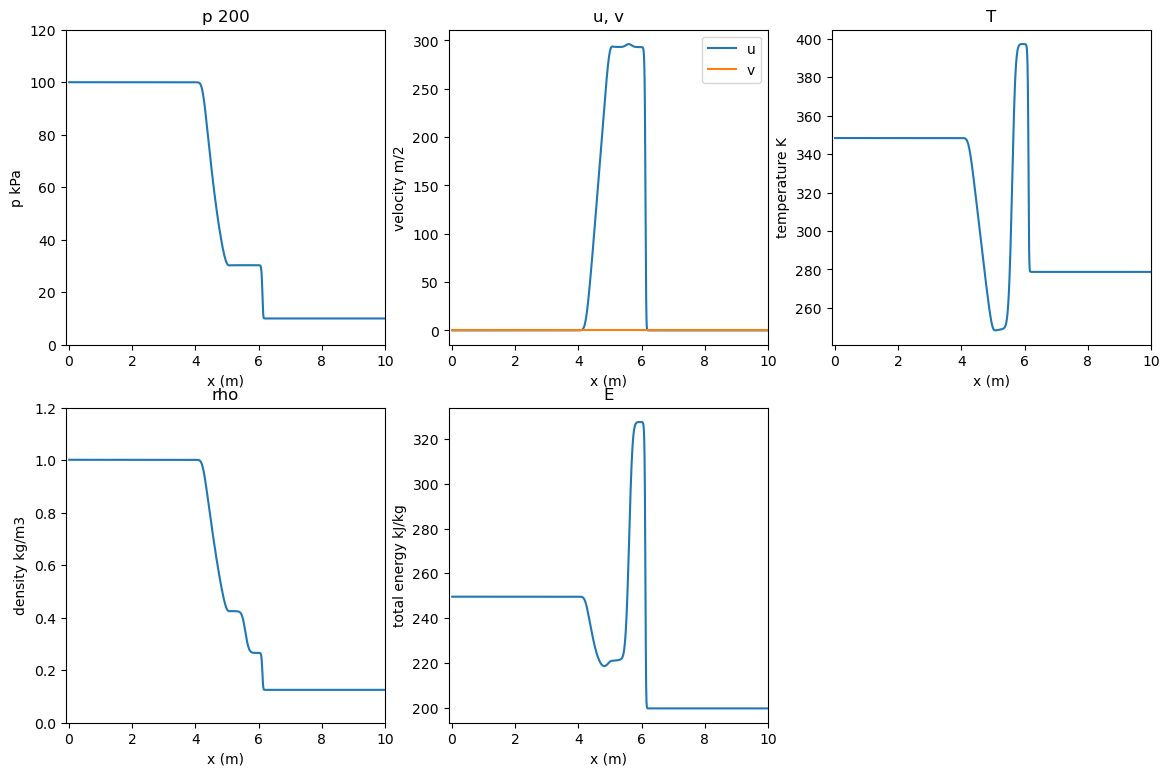

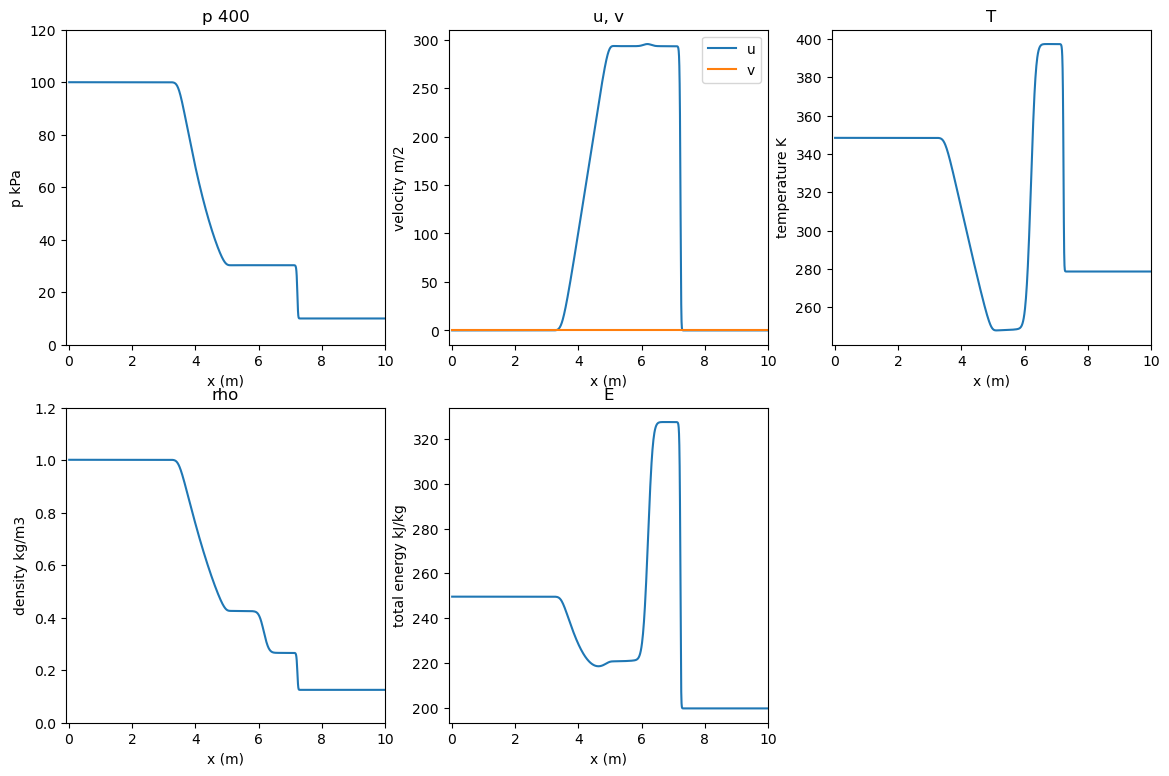

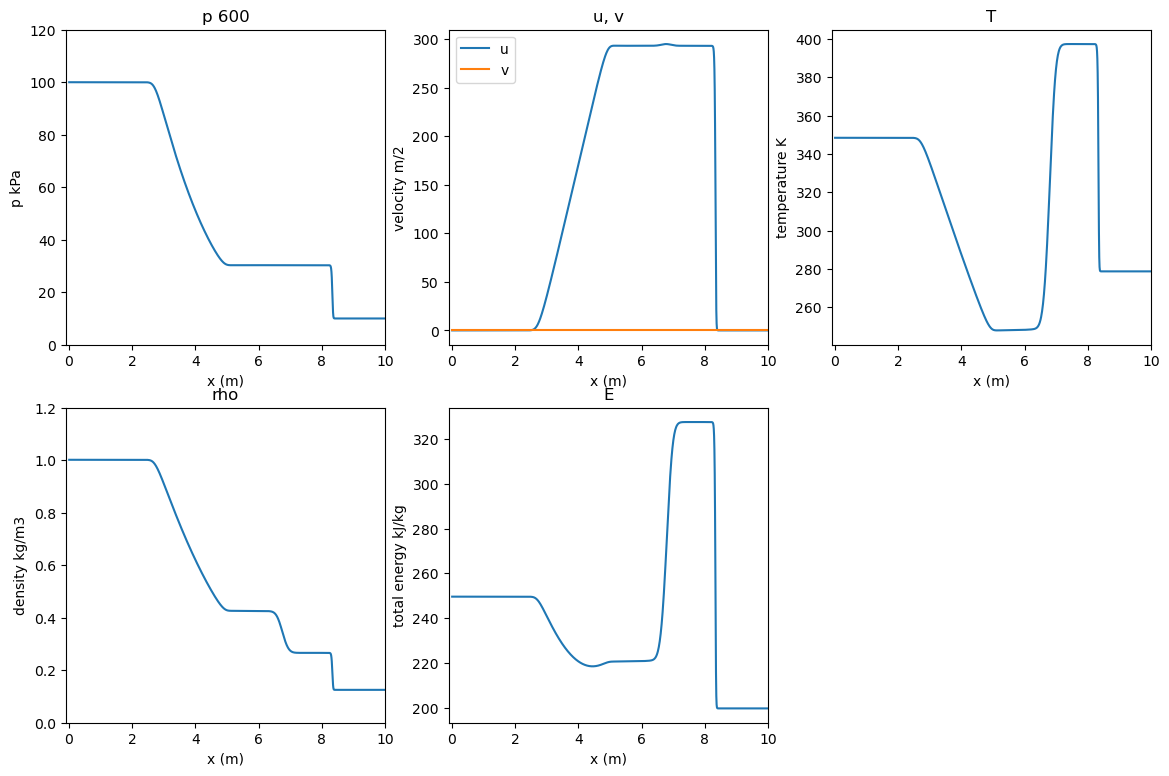

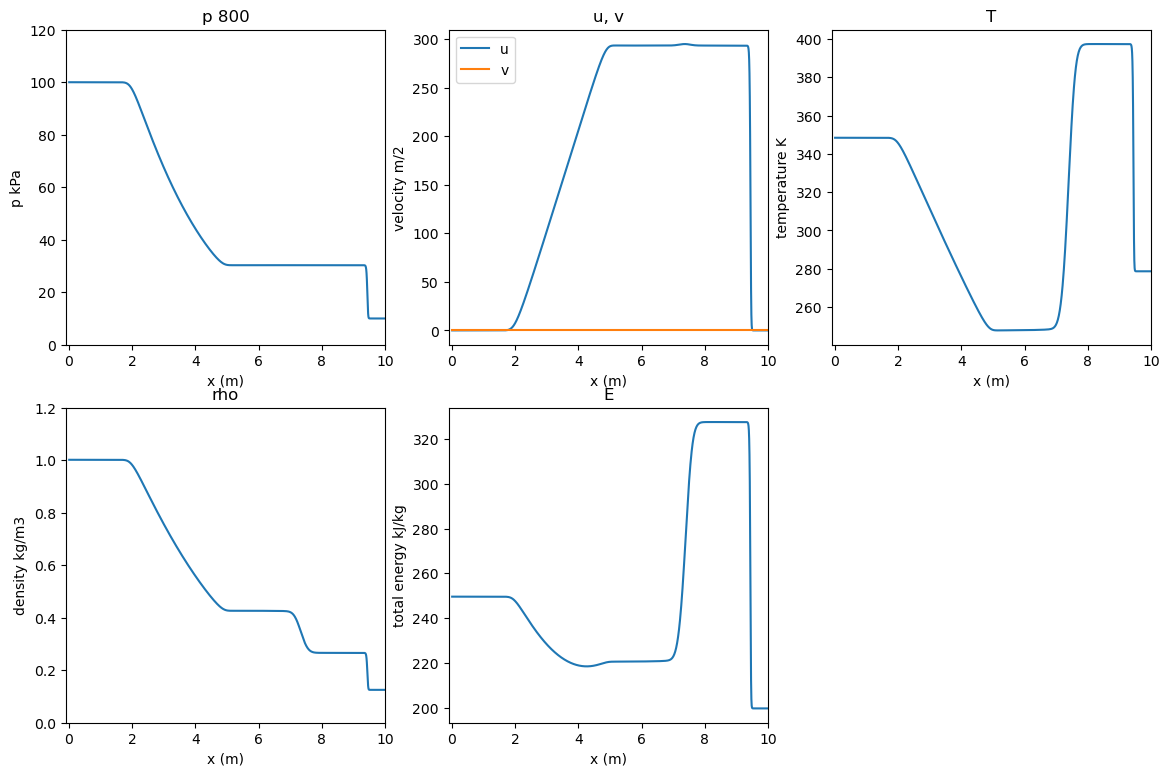

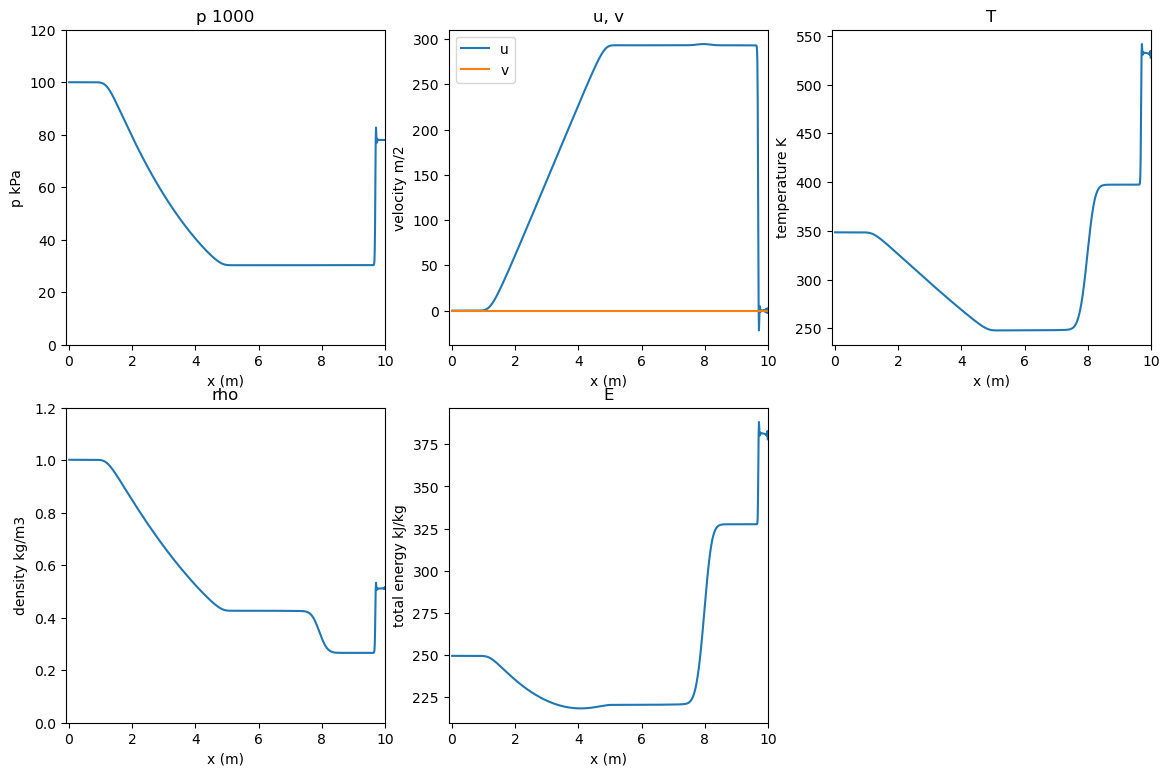

In [10]:
xstart= -0.1
xend=10

for i=200:200:1000
    name = "uvTp"*string(i)

    Dir = "Data-ud-01"
    filename = Dir*"/"*name*".h5"
    file = h5open(filename, "r") 
    u = read(file, "U")
    v = read(file, "V")
    x = read(file, "X")
    y = read(file, "Y")
    Ta = read(file, "T")
    e = read(file, "E")
    p =read(file, "P")
    rho =read(file, "rho")
    close(file)

    skip=1

    println(mean(rho))
    #println(mean(e))
    
    X = x[:,1]
    Y = y[1,:]
    fig = plt.figure(figsize = (14,9))
    ax1 = fig.add_subplot(231)
    ax1.plot(x[:,10], p[:,10].*1e-3, )
    ax1.set_title("p "*string(i))
    ax1.set_ylim(0.,120)
    #ax1.set_xlim(0,0.1)
    ax1.set_xlim(xstart, xend)
    ax1.set_ylabel("p kPa")
    ax1.set_xlabel("x (m)")
    

    ax2 = fig.add_subplot(232)
    ax2.plot(x[:,10], u[:,10], label="u")
    ax2.set_title("u, v")
    ax2.plot(x[:,10], v[:,10], label="v")
    ax2.set_xlim(xstart, xend)
    ax2.legend()
    #ax2.set_ylim(-1.1,1.1)
    ax2.set_ylabel("velocity m/2")
    ax2.set_xlabel("x (m)")

    ax3 = fig.add_subplot(233)
    ax3.plot(x[:,10], Ta[:,10], )
    ax3.set_title("T")
    ax3.set_xlim(xstart, xend)
    ax3.set_ylabel("temperature K")
    ax3.set_xlabel("x (m)")
    
    ax4 = fig.add_subplot(234)
    ax4.plot(x[:,10], rho[:,10], )
    ax4.set_title("rho")
    ax4.set_xlim(xstart, xend)
    ax4.set_ylabel("density kg/m3")
    ax4.set_ylim(0, 1.2)
    ax4.set_xlabel("x (m)")
    
    ax5 = fig.add_subplot(235)
    ax5.plot(x[:,10], e[:,10].*1e-3,)
    ax5.set_title("E")
    ax5.set_xlim(xstart, xend)
    ax5.set_ylabel("total energy kJ/kg")
    ax5.set_xlabel("x (m)")

    plt.savefig(Dir*"/plots_"*name*".png", bbox_inches="tight",)
end